# Fifa 19
Dataset used: [Fifa 19 dataset](https://www.kaggle.com/karangadiya/fifa19)

Target Variable:
- Wage: integer, in thousand €, not null



In [86]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [87]:
# Read data from file
df = pd.read_csv("../data/fifa/fifa19.csv")
pd.set_option('display.max_columns', 500)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [88]:
# show attributes, types and number of entries
df.info()
#df.columns()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

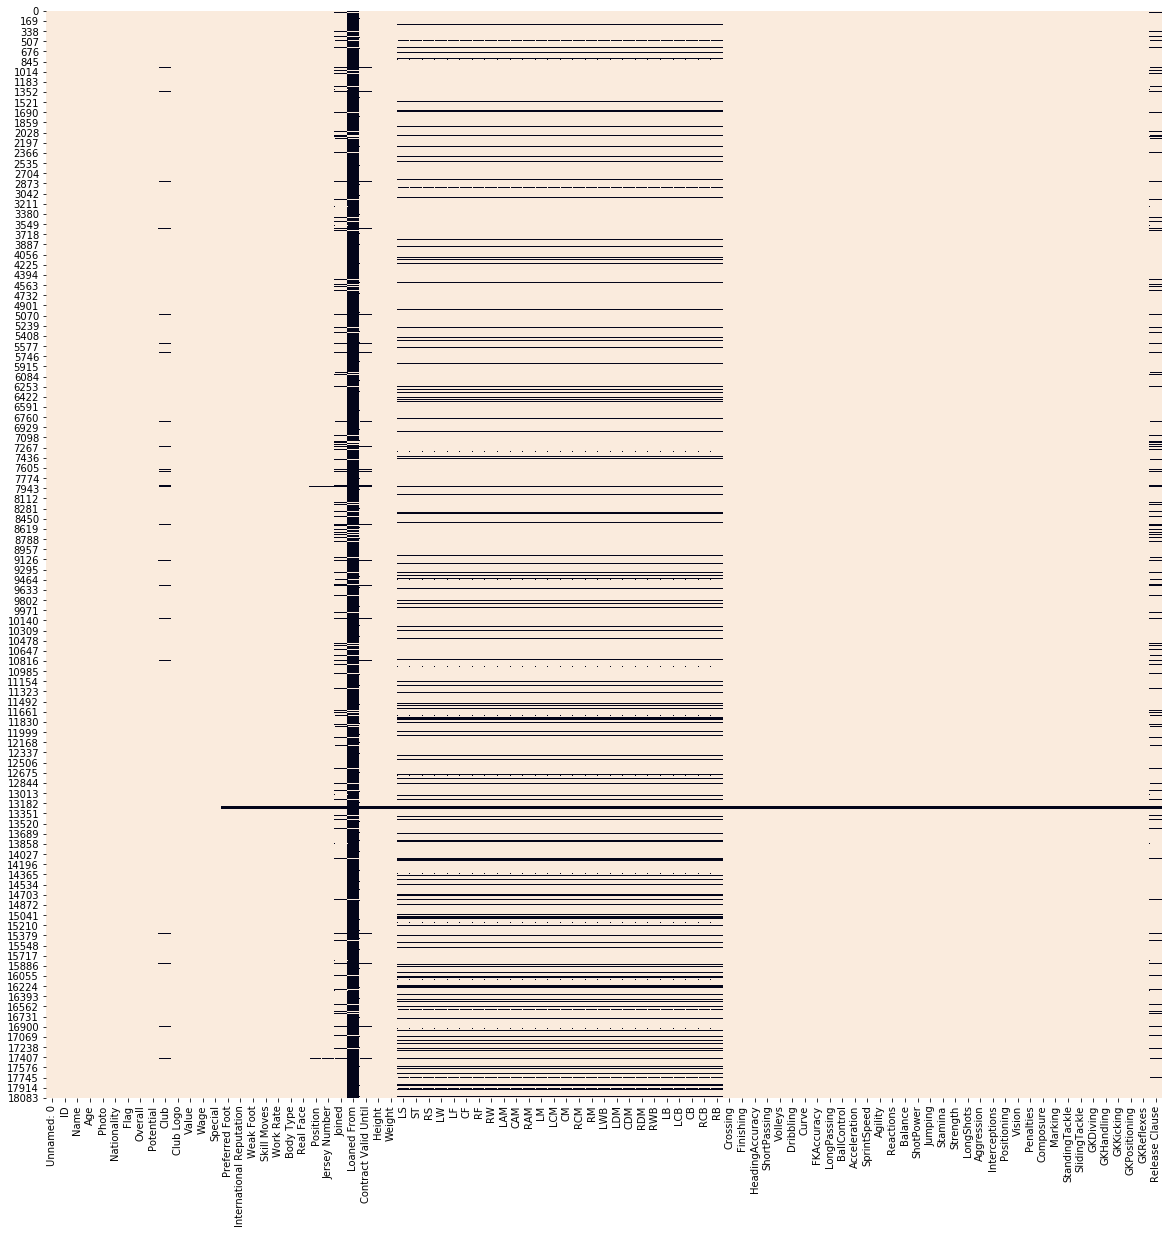

In [89]:
# missing values
# all rows with nan values, 18207 in total
null_fifa = df[df.isnull().values.any(axis=1)]

# how many values missing per column, only if > 0
values_missing = df.isna().sum()
values_missing[values_missing > 0]

# percentage for each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing > 0]

# how many values missing in total, 76984 in total
df.isnull().sum().sum()

# visualize as heatmap, missing values are white
fig, ax = plt.subplots(figsize=(20,20)) 
cmap = sns.cm.rocket_r
sns.heatmap(df.isnull(), cbar=False, ax=ax, cmap=cmap)
# plt.savefig('heatmap_missing_values.png')

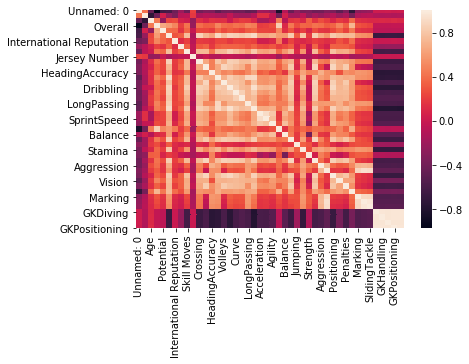

In [90]:
# heatmap visualises the correlation of each pair of values
sns.heatmap(df.corr())

In [99]:
df.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
df = df.drop(columns=["ID", "Photo", "Flag", "Club Logo", "Real Face"])

In [129]:
df.head()

,Index,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [92]:
# format: Value, Wage, Release Clause
# split: work rate -> attack/defence (High, Medium, Low)
# Jersey Number to integer, Loaned From (true/false), Height + Weight format, 
# stats zB LS

# ?: Body Type, Joined, Preferred Foot
# df["Body Type"].unique()
# df.loc[df['Body Type'] == 'Lean']

In [128]:
for value in df["Value"]:
    value_str = str(value)
    value_str.replace("€", "")
    value_str.replace("M", "")
    value_str.replace("K", "")
    # value_int = int(value_str)
    # print(value_int)
    print(value_str)

€110.5M
€77M
€118.5M
€72M
€102M
€93M
€67M
€80M
€51M
€68M
€77M
€76.5M
€44M
€60M
€63M
€89M
€83.5M
€78M
€58M
€53.5M
€51.5M
€60M
€38M
€64.5M
€27M
€81M
€69.5M
€59.5M
€69.5M
€62M
€73.5M
€73.5M
€69.5M
€59M
€46M
€43M
€60M
€36M
€57M
€24M
€30M
€4M
€57M
€64.5M
€51M
€64M
€30.5M
€62.5M
€52M
€38M
€45M
€34M
€46.5M
€46.5M
€34M
€61M
€59.5M
€41.5M
€52M
€44.5M
€56.5M
€53M
€50M
€55M
€36.5M
€46.5M
€45M
€45.5M
€43.5M
€35M
€30M
€39M
€44M
€30M
€43.5M
€18M
€21.5M
€46.5M
€50.5M
€54M
€50M
€36.5M
€40.5M
€50.5M
€40.5M
€38M
€45M
€45M
€37.5M
€28.5M
€37M
€37M
€32M
€37.5M
€39M
€30M
€26M
€37.5M
€30.5M
€33M
€38.5M
€35.5M
€9M
€26M
€15.5M
€37M
€21.5M
€22M
€9M
€14M
€34M
€34M
€32M
€34M
€40.5M
€36.5M
€42.5M
€42.5M
€34M
€35.5M
€31.5M
€38M
€39M
€31.5M
€42M
€37M
€25M
€31.5M
€29.5M
€29.5M
€30M
€27M
€24M
€22M
€31M
€24.5M
€32M
€27.5M
€29.5M
€25M
€30.5M
€24M
€29M
€24M
€27.5M
€16.5M
€23M
€19M
€25M
€19M
€18M
€30M
€4.2M
€15.5M
€15.5M
€40M
€41M
€28M
€22.5M
€28.5M
€30.5M
€34M
€34M
€35.5M
€34M
€29.5M
€36.5M
€34.5M
€33M
€34M
€30.5M
€32.5M

€8.5M
€3.4M
€7M
€7M
€6M
€5M
€8.5M
€6.5M
€7M
€10M
€7M
€8M
€450K
€6.5M
€6.5M
€7.5M
€5M
€7.5M
€9.5M
€9M
€6.5M
€3.5M
€6.5M
€2M
€3.8M
€7M
€6.5M
€9.5M
€2.7M
€4.5M
€6.5M
€4.9M
€12M
€8M
€6.5M
€9M
€5.5M
€7M
€6M
€8M
€8.5M
€8M
€6.5M
€6M
€4.8M
€4.9M
€8.5M
€7M
€2M
€5M
€5M
€6M
€9M
€9M
€8.5M
€12M
€5M
€8.5M
€4M
€7.5M
€6M
€8M
€7M
€2.7M
€2.7M
€6.5M
€6.5M
€8.5M
€7M
€5M
€6.5M
€9M
€4M
€8.5M
€7M
€7.5M
€4.2M
€4.7M
€7M
€9M
€900K
€900K
€8.5M
€11M
€900K
€6.5M
€7M
€7M
€8.5M
€5M
€5.5M
€7.5M
€12M
€6M
€7M
€6M
€5.5M
€7M
€9M
€8.5M
€5M
€10M
€2.7M
€7.5M
€9.5M
€4.4M
€10M
€5M
€6.5M
€9.5M
€8M
€0
€11M
€4.5M
€6.5M
€8.5M
€8M
€7.5M
€8.5M
€6.5M
€8.5M
€8M
€6.5M
€7.5M
€10M
€7M
€6.5M
€8M
€7M
€5.5M
€9.5M
€5M
€4.9M
€3.4M
€9.5M
€10M
€4.4M
€5.5M
€4M
€4.9M
€450K
€2.7M
€6M
€8.5M
€6.5M
€6M
€4.5M
€8M
€8.5M
€9M
€5.5M
€8M
€7.5M
€8M
€7.5M
€900K
€6.5M
€7.5M
€10.5M
€4.4M
€8M
€7M
€2.7M
€7M
€5.5M
€8.5M
€9.5M
€8.5M
€6.5M
€9M
€9M
€7.5M
€8M
€8.5M
€8M
€4.8M
€8M
€10M
€6M
€6.5M
€7.5M
€4.9M
€4.5M
€6.5M
€10.5M
€6.5M
€9.5M
€5M
€5.5M
€6.5M
€8.5M
€7.5M
€4

€1.3M
€2.9M
€2.8M
€2.5M
€3.6M
€2.5M
€1.8M
€2.3M
€3.2M
€0
€2.8M
€2.4M
€2M
€2M
€550K
€2M
€3.5M
€3.2M
€2.4M
€3.3M
€3.2M
€1.5M
€1.2M
€1.9M
€3.6M
€3.3M
€2.3M
€2.6M
€2.8M
€1.8M
€3.1M
€2.4M
€4.1M
€2.7M
€2.3M
€1.7M
€2.4M
€2.4M
€325K
€3.2M
€2.5M
€2.2M
€1.8M
€800K
€2.4M
€2.4M
€2.8M
€1.6M
€3.3M
€850K
€3M
€325K
€750K
€3.2M
€1.4M
€3.5M
€2.8M
€2.5M
€2.2M
€1.4M
€2.5M
€1.8M
€4.3M
€2.2M
€2.3M
€850K
€2.8M
€3M
€1.5M
€2.5M
€1.8M
€950K
€3.7M
€2.5M
€2.1M
€2.3M
€3M
€1.8M
€1.8M
€1.9M
€2.8M
€2.3M
€2.5M
€750K
€2.8M
€1.8M
€2.9M
€1.8M
€3.2M
€3M
€1.2M
€3.2M
€2.8M
€2.8M
€270K
€2.8M
€1.2M
€1.8M
€2.4M
€1.5M
€160K
€3M
€2.2M
€2.3M
€3.2M
€1.6M
€2.2M
€2.5M
€3M
€2.7M
€3.9M
€3.9M
€1.5M
€1.2M
€2.2M
€2.7M
€1.8M
€1.4M
€3.2M
€3M
€3.1M
€2.3M
€3.3M
€2.8M
€675K
€4.2M
€2.8M
€3.8M
€2.8M
€1.7M
€2.4M
€675K
€4.1M
€2.6M
€675K
€2.7M
€1.4M
€2.4M
€2.8M
€2.8M
€725K
€2.3M
€160K
€1.1M
€2.6M
€2M
€2.7M
€3.3M
€1.8M
€3.6M
€2.4M
€325K
€950K
€2.9M
€1.4M
€1.6M
€3.1M
€950K
€2.4M
€0
€3.2M
€3M
€2.5M
€2.3M
€3.2M
€4.3M
€2M
€2.3M
€2.5M
€2.3M
€2.5M
€2.5M


€425K
€2.3M
€1.7M
€700K
€650K
€825K
€850K
€1.1M
€1.3M
€70K
€1.2M
€0
€1M
€1.4M
€1M
€0
€850K
€1.4M
€1.6M
€750K
€1.1M
€875K
€700K
€1.5M
€775K
€1.2M
€2.2M
€2M
€1.3M
€1.2M
€975K
€700K
€875K
€1.2M
€1M
€1.4M
€1.4M
€1M
€1.8M
€1.3M
€1.7M
€1.3M
€1.1M
€1.3M
€875K
€1.1M
€1.2M
€700K
€1M
€850K
€825K
€1.2M
€900K
€2.3M
€1.4M
€1.2M
€1.6M
€925K
€1.6M
€575K
€975K
€1.4M
€1.3M
€1.7M
€1.5M
€975K
€425K
€1.2M
€1.1M
€625K
€1.6M
€1M
€1.4M
€425K
€575K
€1.1M
€1.1M
€950K
€1.5M
€1.3M
€325K
€1.4M
€1.4M
€1M
€1.8M
€1.4M
€925K
€1.3M
€1.6M
€1.4M
€875K
€825K
€1.1M
€1.4M
€1.2M
€1.1M
€2.1M
€1M
€1.1M
€1M
€1.3M
€1M
€1M
€1.1M
€1M
€1.1M
€950K
€1.4M
€250K
€1.3M
€1.1M
€750K
€775K
€1.3M
€1.7M
€1M
€1.1M
€1.1M
€525K
€600K
€1.2M
€1.1M
€1.2M
€1.1M
€1.3M
€1.1M
€600K
€825K
€800K
€825K
€1M
€1.2M
€1.2M
€1M
€750K
€1.1M
€1.3M
€1.2M
€1.6M
€1M
€1M
€775K
€1.2M
€700K
€1.1M
€1.3M
€1M
€1.3M
€1.2M
€1M
€1.6M
€600K
€1M
€1.7M
€1.1M
€1.5M
€1.3M
€1.6M
€1.6M
€700K
€475K
€1M
€825K
€1.1M
€1.6M
€1.2M
€1.1M
€825K
€1.1M
€1.2M
€1.4M
€700K
€1.1M
€1M
€1.3M
€1.

€750K
€850K
€1.5M
€1M
€1M
€950K
€1.3M
€575K
€525K
€800K
€750K
€950K
€950K
€1.1M
€825K
€600K
€1M
€1M
€825K
€800K
€850K
€975K
€525K
€800K
€600K
€1.3M
€675K
€1.1M
€850K
€675K
€850K
€100K
€1M
€900K
€1.3M
€1.1M
€900K
€750K
€800K
€725K
€700K
€725K
€575K
€500K
€825K
€975K
€1.5M
€1M
€550K
€575K
€600K
€725K
€925K
€1M
€725K
€600K
€450K
€900K
€1.1M
€800K
€575K
€290K
€600K
€1.5M
€925K
€1.3M
€1.3M
€1.1M
€575K
€1M
€725K
€1.2M
€575K
€900K
€725K
€700K
€975K
€1.1M
€1.2M
€0
€725K
€1M
€800K
€825K
€1.3M
€1.3M
€1.1M
€240K
€625K
€900K
€1.5M
€975K
€575K
€825K
€1M
€1.6M
€600K
€825K
€1M
€750K
€1M
€1.4M
€0
€750K
€1.2M
€1.1M
€1.1M
€950K
€575K
€1.1M
€1.2M
€1.1M
€775K
€1M
€1.1M
€975K
€1.2M
€800K
€925K
€900K
€290K
€850K
€925K
€750K
€525K
€875K
€800K
€725K
€725K
€800K
€600K
€300K
€1.7M
€750K
€1.1M
€675K
€900K
€675K
€975K
€1.1M
€1.2M
€575K
€875K
€875K
€775K
€575K
€750K
€800K
€825K
€625K
€1.7M
€230K
€975K
€775K
€1.2M
€1.3M
€400K
€625K
€240K
€950K
€1.1M
€750K
€900K
€925K
€775K
€725K
€975K
€775K
€750K
€600K
€1.1M
€1.1M


€925K
€650K
€525K
€575K
€525K
€950K
€625K
€1.1M
€325K
€500K
€475K
€850K
€750K
€575K
€550K
€300K
€550K
€750K
€130K
€1M
€625K
€210K
€325K
€1.1M
€525K
€70K
€240K
€425K
€575K
€525K
€575K
€500K
€600K
€600K
€650K
€425K
€725K
€750K
€775K
€70K
€700K
€0
€220K
€975K
€400K
€450K
€625K
€220K
€375K
€1.2M
€675K
€1.1M
€575K
€0
€650K
€525K
€650K
€300K
€220K
€500K
€650K
€400K
€775K
€700K
€475K
€750K
€550K
€650K
€750K
€825K
€725K
€550K
€300K
€950K
€0
€220K
€675K
€450K
€725K
€400K
€775K
€750K
€750K
€375K
€575K
€1.2M
€650K
€550K
€550K
€750K
€400K
€1M
€800K
€350K
€550K
€850K
€675K
€825K
€600K
€425K
€325K
€575K
€750K
€825K
€300K
€450K
€725K
€475K
€1.2M
€850K
€575K
€600K
€600K
€220K
€1.2M
€475K
€325K
€650K
€350K
€1.1M
€725K
€130K
€450K
€425K
€725K
€70K
€525K
€325K
€775K
€550K
€775K
€400K
€575K
€950K
€525K
€575K
€1M
€550K
€425K
€325K
€750K
€575K
€550K
€575K
€550K
€675K
€130K
€800K
€550K
€70K
€500K
€675K
€450K
€575K
€525K
€650K
€1M
€850K
€150K
€700K
€675K
€575K
€425K
€650K
€160K
€650K
€550K
€675K
€625K
€450K
€

€450K
€800K
€375K
€475K
€60K
€300K
€500K
€375K
€625K
€600K
€450K
€550K
€700K
€600K
€775K
€475K
€325K
€775K
€450K
€425K
€975K
€350K
€775K
€375K
€875K
€450K
€550K
€300K
€140K
€450K
€525K
€925K
€550K
€425K
€180K
€400K
€140K
€525K
€600K
€600K
€450K
€500K
€400K
€525K
€675K
€450K
€475K
€400K
€450K
€625K
€450K
€450K
€375K
€700K
€425K
€475K
€600K
€500K
€500K
€625K
€950K
€600K
€400K
€500K
€550K
€600K
€675K
€525K
€875K
€450K
€575K
€425K
€400K
€500K
€525K
€550K
€110K
€550K
€600K
€575K
€60K
€350K
€475K
€450K
€475K
€625K
€140K
€575K
€750K
€450K
€1M
€875K
€450K
€425K
€500K
€700K
€500K
€525K
€675K
€500K
€950K
€625K
€260K
€375K
€450K
€700K
€575K
€650K
€575K
€400K
€550K
€475K
€600K
€775K
€625K
€600K
€300K
€650K
€475K
€550K
€350K
€375K
€475K
€450K
€725K
€0
€325K
€475K
€725K
€875K
€300K
€325K
€700K
€500K
€450K
€700K
€625K
€325K
€675K
€525K
€700K
€400K
€650K
€525K
€270K
€525K
€875K
€325K
€425K
€270K
€500K
€475K
€675K
€675K
€300K
€475K
€425K
€825K
€750K
€475K
€450K
€675K
€375K
€475K
€525K
€325K
€625K
€525K

€350K
€500K
€625K
€425K
€400K
€525K
€500K
€425K
€425K
€525K
€500K
€400K
€240K
€350K
€650K
€170K
€450K
€325K
€325K
€600K
€120K
€350K
€550K
€450K
€375K
€300K
€350K
€450K
€120K
€200K
€350K
€300K
€170K
€90K
€550K
€375K
€375K
€325K
€425K
€650K
€400K
€600K
€325K
€230K
€375K
€290K
€260K
€500K
€400K
€425K
€350K
€625K
€325K
€260K
€270K
€375K
€160K
€425K
€375K
€170K
€450K
€475K
€400K
€500K
€400K
€280K
€375K
€300K
€325K
€600K
€500K
€290K
€400K
€250K
€350K
€375K
€475K
€325K
€375K
€450K
€575K
€525K
€40K
€325K
€300K
€425K
€300K
€525K
€325K
€425K
€450K
€375K
€625K
€450K
€240K
€325K
€475K
€260K
€240K
€350K
€675K
€575K
€250K
€325K
€475K
€375K
€200K
€280K
€200K
€400K
€325K
€525K
€425K
€675K
€400K
€325K
€450K
€230K
€425K
€425K
€475K
€425K
€450K
€600K
€550K
€325K
€425K
€270K
€475K
€425K
€220K
€400K
€650K
€675K
€625K
€300K
€425K
€350K
€425K
€400K
€675K
€150K
€220K
€450K
€650K
€400K
€325K
€300K
€325K
€270K
€500K
€550K
€400K
€400K
€375K
€220K
€100K
€400K
€325K
€425K
€525K
€260K
€250K
€550K
€300K
€300K
€550K


€190K
€130K
€190K
€160K
€160K
€70K
€110K
€150K
€170K
€130K
€80K
€160K
€180K
€140K
€150K
€130K
€150K
€120K
€190K
€140K
€140K
€110K
€180K
€180K
€90K
€190K
€180K
€110K
€140K
€190K
€120K
€180K
€120K
€90K
€90K
€190K
€130K
€190K
€120K
€150K
€110K
€120K
€180K
€110K
€180K
€90K
€150K
€130K
€100K
€160K
€120K
€100K
€180K
€120K
€140K
€120K
€170K
€0
€130K
€170K
€160K
€180K
€190K
€150K
€110K
€170K
€70K
€140K
€190K
€10K
€70K
€170K
€100K
€100K
€180K
€0
€90K
€140K
€150K
€120K
€180K
€160K
€140K
€180K
€90K
€190K
€100K
€140K
€180K
€160K
€120K
€120K
€160K
€100K
€200K
€160K
€110K
€140K
€120K
€150K
€90K
€180K
€130K
€110K
€120K
€90K
€170K
€110K
€160K
€90K
€110K
€170K
€100K
€100K
€150K
€70K
€180K
€80K
€100K
€170K
€110K
€160K
€80K
€180K
€180K
€140K
€180K
€110K
€170K
€160K
€200K
€150K
€170K
€110K
€180K
€190K
€180K
€140K
€200K
€140K
€160K
€150K
€100K
€90K
€110K
€100K
€130K
€100K
€150K
€150K
€90K
€130K
€110K
€90K
€110K
€110K
€130K
€120K
€80K
€150K
€90K
€100K
€90K
€80K
€130K
€150K
€90K
€70K
€150K
€80K
€130K
€110K
€

In [123]:
df["Value"]

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [134]:
for x in df["Preferred Foot"]:
    x_str = str(x)
    if x_str=="Left":
        value=0
    else:
        value=1
    print(value)

0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
0
1
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
0
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
0
1
1
0
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
1
0
1
1
0
0
1


1
0
1
0
0
0
0
1
0
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
0
1
0
1
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
1
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
0
0
0
1
1
1
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
0
0


1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
1
1
0
1
0
1
0
1
1
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
0
1
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
1
0
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1


1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
0
1
0
0
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1


In [135]:
df["Preferred Foot"]

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

In [103]:
# Train & Test
train, test = train_test_split(df, test_size=0.2)

# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = LinearRegression()
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: could not convert string to float: 'Hong Jeong Ho'